In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load Data from CSV file

In [125]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


#Data preprocessing

### structure of Dataset

In [126]:
data.describe()

,id,label
count,7920.000000,7920.000000
mean,3960.500000,0.255808
std,2286.451399,0.436342
min,1.000000,0.000000
25%,1980.750000,0.000000
50%,3960.500000,0.000000
75%,5940.250000,1.000000
max,7920.000000,1.000000


In [127]:
data.shape

(7920, 3)

In [128]:
data.duplicated().sum()

0

In [129]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing
#### convert uppercase to lowercase
#### remove links
#### remove punctuation
#### remove stopwords
#### stemming

In [130]:
import re
import string

In [131]:
for col in data.columns:
  unique_vals=data[col].unique()
  print(f"{col} unique values")
  print(unique_vals)

id unique values
[   1    2    3 ... 7918 7919 7920]
label unique values
[0 1]
tweet unique values
['#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'
 'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/'
 'We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu'
 ...
 "Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!"
 'Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/'
 'Apple Barcelona!!! #Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew… http://instagram.com/p/wBApVzpCl3/']


In [132]:
data['tweet'].unique()

array(['#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone',
       'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/',
       'We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu',
       ...,
       "Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!",
       'Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/',
       'Apple Barcelona!!! #Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew… http://instagram.com/p/wBApVzpCl3/'],
      dtype=object)

In [133]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

#### upper case -> lower case

In [134]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### removing links

In [135]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))
data["tweet"].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

#### removing punctupunctuations

In [136]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [137]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

data["tweet"].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

In [138]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### remove numbers

In [139]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

#### remove stopwords

In [140]:
import nltk

In [141]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [142]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [143]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

#### stemming

In [144]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [145]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

### building vacabulary

In [146]:
from collections import Counter
vocab = Counter()

In [147]:
for sentence in data['tweet']:
    print(sentence,'\n')
    vocab.update(sentence.split())

print(len(vocab))


fingerprint pregnanc test android app beauti cute health iger iphoneonli iphonesia iphon 

final transpar silicon case thank uncl yay soni xperia sonyexperias… 

love would go talk makememori unplug relax iphon smartphon wifi connect 

im wire know im georg made way iphon cute daventri home 

amaz servic appl wont even talk question unless pay stupid support 

iphon softwar updat fuck phone big time stupid iphon 

happi us instap instadaili us soni xperia xperiaz 

new type c charger cabl uk … bay amazon etsi new year rob cross tobi young evemun mcmafia taylor spectr newyear start recip technolog samsunggalaxi iphonex pictwittercompjiwqwtc 

bout go shop listen music iphon justm music likeforlik followforfollow… 

photo fun selfi pool water soni camera picoftheday sun instagood boy cute outdoor 

hey appl make new ipod dont make new color inch thinner make crash everi five fuckin minit 

ha heavi machineri need appl realli drop ball design drinkyourhaterad 

contempl give iphon bandwag

numbere of data < number of fethurs(here its 1 word = 1 feture){mehema nounoth over fit wenava model eka}

In [148]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [149]:
data.shape

(7920, 3)

if model over fiting
training accuresy >>> testing accurecy

In [150]:
# fetuer selection. in here if count is > 10 select that feture
tokens = [key for key in vocab if vocab[key] > 10]
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [151]:
print(len(tokens))
print(len(vocab))

1145
15949


In [152]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset 

In [153]:
X = data['tweet']
y = data['label']

In [154]:
X

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [155]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [157]:
X_train.shape

(6336,)

In [158]:
X_train

3376     realli itun almost fuck hour download io appl io
7663    happi birthday anji birthday friend wow samsun...
2302    samsung car adapt avail store caradapt car sam...
5009       gb white ipad woop cheer walk store theirdevic
5853    ye total unexpect thank ninong vicpaul netbook...
                              ...                        
112     get tast frank ocean’ new… news photographi fa...
1567    follow capetownsup instagram sup surf fun cape...
5848    enjoy life fullest philippin travelita backpac...
1692    moment appl make bottlerock napa livemus stoke...
4865    love djfunkyj insta instagood iphon iphonesia ...
Name: tweet, Length: 6336, dtype: object

In [159]:
y_train

3376    1
7663    0
2302    0
5009    1
5853    0
       ..
112     0
1567    0
5848    0
1692    0
4865    0
Name: label, Length: 6336, dtype: int64

### Vectorization 

In [160]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [161]:
vectorized_x_train = vectorizer(X_train, tokens)

In [162]:
vectorized_x_test = vectorizer(X_test, tokens)

In [163]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [164]:
y_train

3376    1
7663    0
2302    0
5009    1
5853    0
       ..
112     0
1567    0
5848    0
1692    0
4865    0
Name: label, Length: 6336, dtype: int64

In [165]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [166]:
y_train.value_counts()

label
0    4737
1    1599
Name: count, dtype: int64

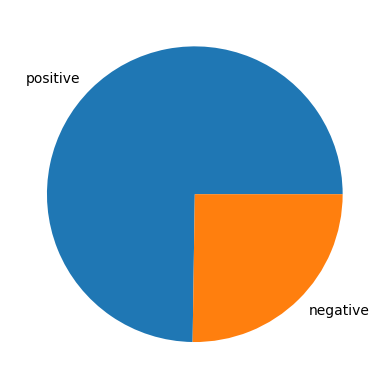

In [167]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['positive','negative'])
plt.show()

In [168]:
!pip install imbalanced-learn

In [169]:
from imblearn.over_sampling import SMOTE
smote= SMOTE()
vectorized_x_train_smote,y_train_smote=smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9474, 1145) (9474,)


In [170]:
y_train_smote.value_counts()

label
1    4737
0    4737
Name: count, dtype: int64

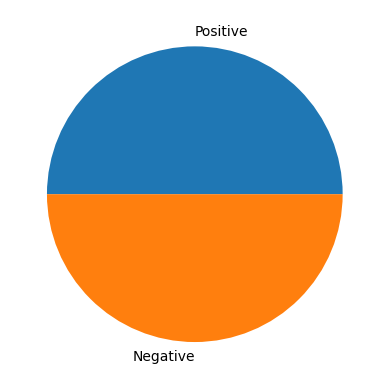

In [171]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [172]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [173]:
y_train_smote

0       1
1       0
2       0
3       1
4       0
       ..
9469    1
9470    1
9471    1
9472    1
9473    1
Name: label, Length: 9474, dtype: int64

In [174]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [175]:
y_test

7610    0
3145    0
3174    1
336     0
6049    0
       ..
3463    0
168     0
3291    1
4332    1
5300    0
Name: label, Length: 1584, dtype: int64

### Model Training and Evaluation


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [177]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### logistic Regression


In [178]:
lr= LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred= lr.predict(vectorized_x_train_smote)
y_test_pred= lr.predict(vectorized_x_test)
training_scores(y_train_smote,y_train_pred)
validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.942
	Precision = 0.916
	Recall = 0.973
	F1-Score = 0.944
Testing Scores:
	Accuracy = 0.864
	Precision = 0.719
	Recall = 0.81
	F1-Score = 0.762


### Naive Bayes 

In [179]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.909
	Precision = 0.872
	Recall = 0.96
	F1-Score = 0.914
Testing Scores:
	Accuracy = 0.868
	Precision = 0.698
	Recall = 0.899
	F1-Score = 0.786


### Decision Tree 

In [180]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote,y_train_smote)
y_train_pred= dt.predict(vectorized_x_train_smote)
y_test_pred= dt.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.831
	Precision = 0.696
	Recall = 0.66
	F1-Score = 0.678


In [181]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.5,0.8,1.2],'kernel':['linear', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid)
grid_search.fit(vectorized_x_train_smote, y_train_smote)
grid_search.best_params_
grid_search.score(vectorized_x_test,y_test)

0.8794191919191919

### Support Vector Machine 

In [182]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.979
	Precision = 0.963
	Recall = 0.997
	F1-Score = 0.98
Testing Scores:
	Accuracy = 0.878
	Precision = 0.773
	Recall = 0.775
	F1-Score = 0.774


In [183]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.5,0.8,1.2],'kernel':['linear', 'poly', 'sigmoid']}
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid)
grid_search.fit(vectorized_x_train_smote, y_train_smote)
grid_search.best_params_
print(grid_search.score(vectorized_x_test,y_test))

y_train_pred = grid_search.predict(vectorized_x_train_smote)
y_test_pred = grid_search.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

0.8686868686868687
Training Scores:
	Accuracy = 0.945
	Precision = 0.918
	Recall = 0.978
	F1-Score = 0.947
Testing Scores:
	Accuracy = 0.869
	Precision = 0.726
	Recall = 0.824
	F1-Score = 0.772


In [184]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)